# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')

In [41]:
# set up lists to hold reponse info
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
# Loop through the list of cities and perform a request for data on each
response = requests.get(url)
response_json = response.json()

for city in cities:
      
    
    try:
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        count = count + 1
        print(city)
    except KeyError:
        print(f"No city found")
        
    


yellowknife
hermanus
victoria
puerto ayora
hobart
rikitea
malakal
norilsk
belushya guba
vestmannaeyjar
umm lajj
cavalcante
luau
akyab
tura
albany
husavik
salinopolis
georgetown
vaini
hami
port hedland
norsup
solsvik
jumla
shelburne
dikson
east london
samarai
saint-pierre
kyzyl-suu
bredasdorp
bluff
punta arenas
barentsburg
don sak
el tumbador
khatanga
mataura
jojoima
saint-joseph
nanga eboko
kaeo
leningradskiy
mahajanga
ushuaia
sinnamary
pisco
dourados
junin
saint george
basco
guarda
carnarvon
kailua
hambantota
lompoc
chuy
turukhansk
bethel
langsa
tecpan
jamestown
kapaa
komsomolskiy
guerrero negro
pangkalanbuun
puerto escondido
havre
qaqortoq
sakakah
kosikha
sao filipe
maceio
marcona
mar del plata
mrirt
lebu
amalapuram
nizhneyansk
port elizabeth
longyearbyen
shushenskoye
hobyo
cape town
port keats
new norfolk
busselton
halalo
pitea
arraial do cabo
boissevain
manokwari
upernavik
cabo san lucas
ponta do sol
maldonado
mocuba
avarua
lagoa
atuona
hithadhoo
port alfred
byron bay
caravelas
miz

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:

weather_dict = pd.DataFrame ({
    "country": country,
    "city": city,
    "lat": lat,
    "lng": lng,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "temperature": max_temp,
    "wind speed": wind_speed, 
})


weather_dict.to_csv("../output_data/cities.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

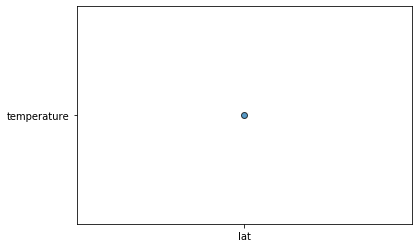

In [48]:


plt.scatter(["lat"], ["temperature"], marker="o", edgecolors="black", alpha=0.75)

## Latitude vs. Humidity Plot

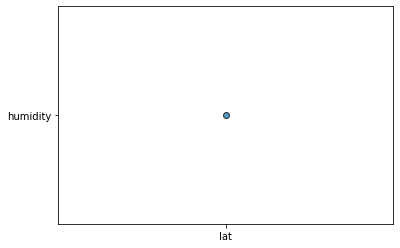

In [49]:
plt.scatter(["lat"], ["humidity"], marker="o", edgecolors="black", alpha=0.75)

## Latitude vs. Cloudiness Plot

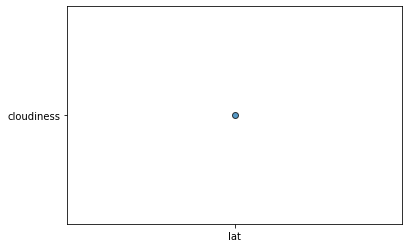

In [50]:
plt.scatter(["lat"], ["cloudiness"], marker="o", edgecolors="black", alpha=0.75)

## Latitude vs. Wind Speed Plot

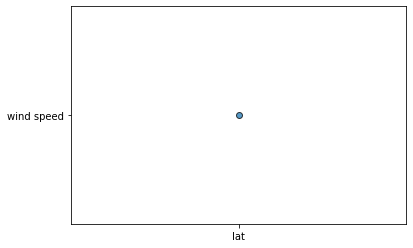

In [51]:
plt.scatter(["lat"], ["wind speed"], marker="o", edgecolors="black", alpha=0.75)

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression